In [1]:
import numpy as np 
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass
import matplotlib.pyplot as plt
import dcs.localEquilibrium 

In [2]:
surfField_QAS = dcs.localEquilibrium.ArbitrarySurfaceField.readVMEC("wout_QAS.nc") 

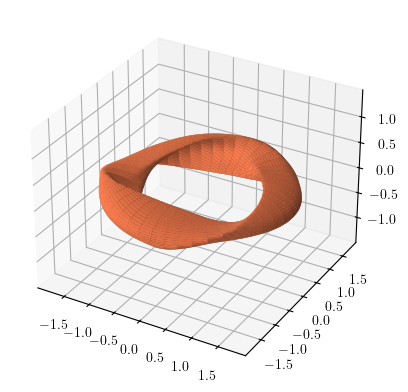

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
_ = surfField_QAS.surf.plot_plt(fig=fig, ax=ax)

In [4]:
surfField_QAS.solveJacobian()
surfField_QAS.solveJacobianReciprocal()

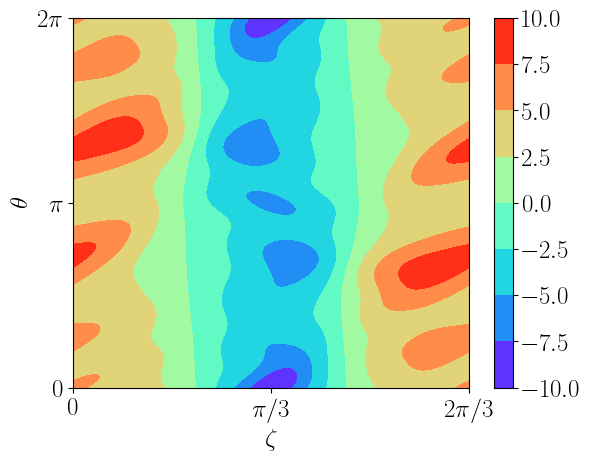

In [5]:
fig, ax = plt.subplots()
# surfField_QAS.plotB(ax=ax, fig=fig)
surfField_QAS.Jacobian.plot_plt(ax=ax, fig=fig)

AttributeError: 'ArbitrarySurfaceField' object has no attribute 'D'

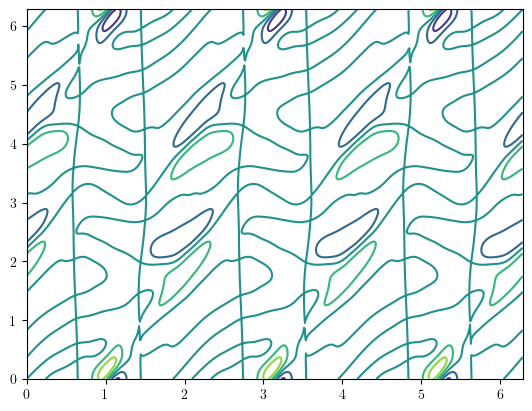

In [6]:
import numpy as np 
from dcs.toroidalField import derivatePol, derivateTor

basisTheta, basisZeta = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
gridBasisZeta, gridBasisTheta = np.meshgrid(basisZeta, basisTheta)

fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, 
    (
        (surfField_QAS.P*derivatePol(surfField_QAS.Jacobian)) - surfField_QAS.Q*derivateTor(surfField_QAS.Jacobian)
    ).getValue(gridBasisTheta,gridBasisZeta)
)
(surfField_QAS.Jacobian*surfField_QAS.D).plot_plt(ax=ax, fig=fig, onePeriod=True) 